In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

sns.set_style('whitegrid')

In [3]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Initial inspection
print("Dataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Descriptive Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
co

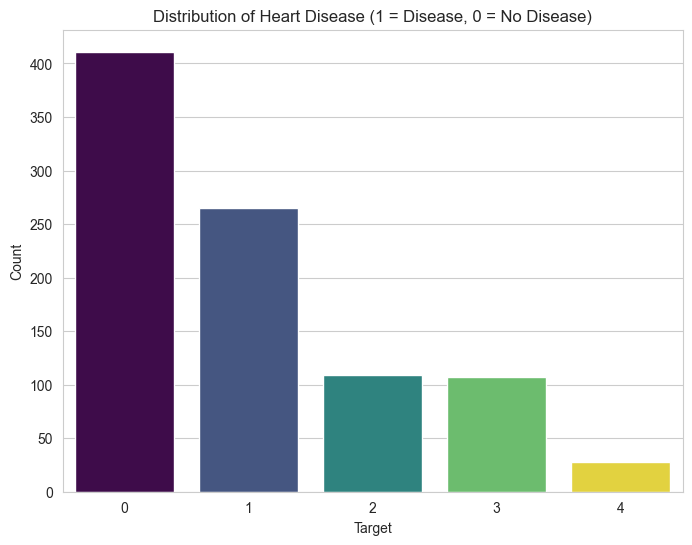

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

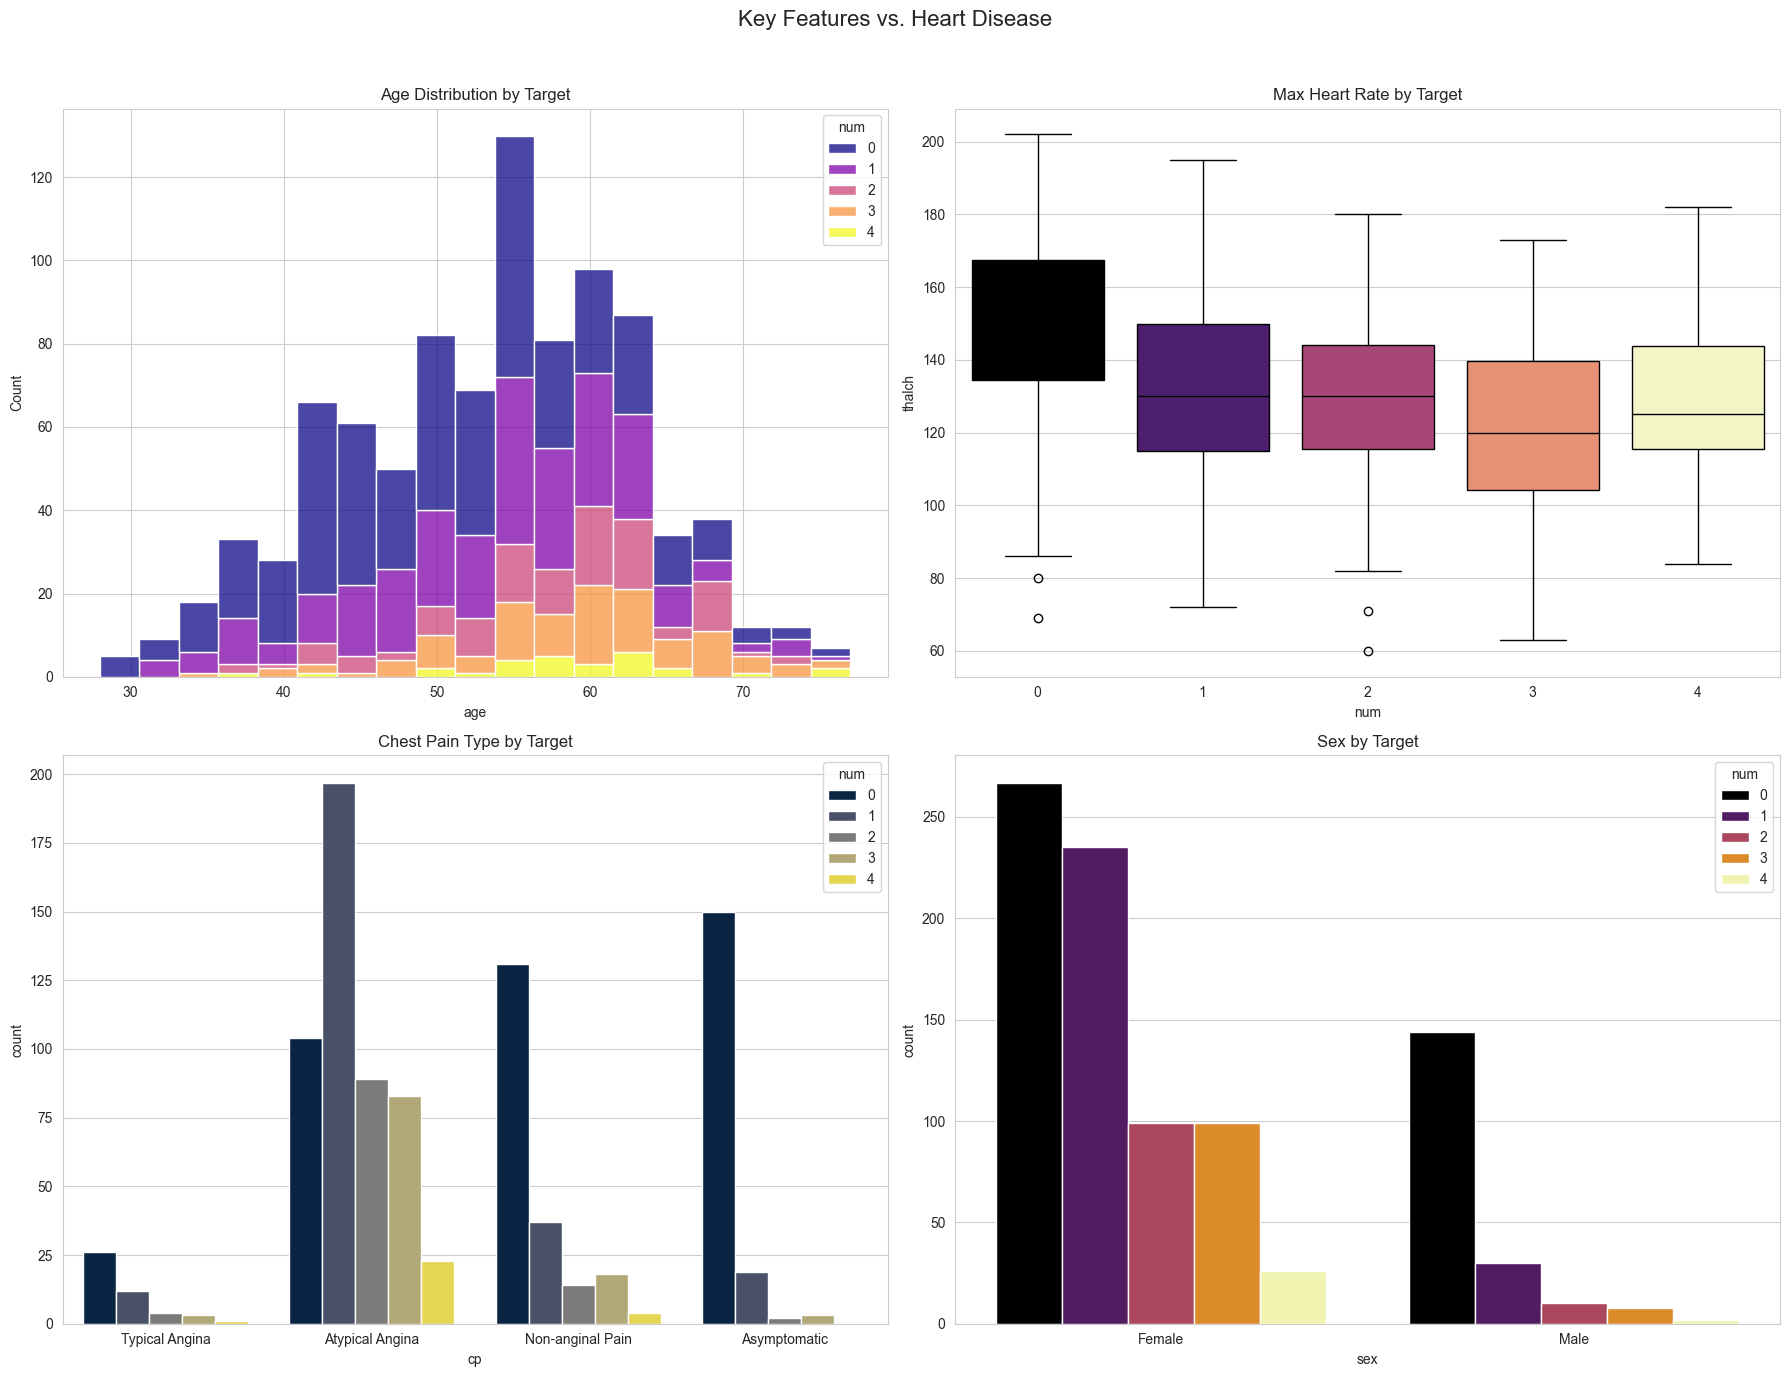

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

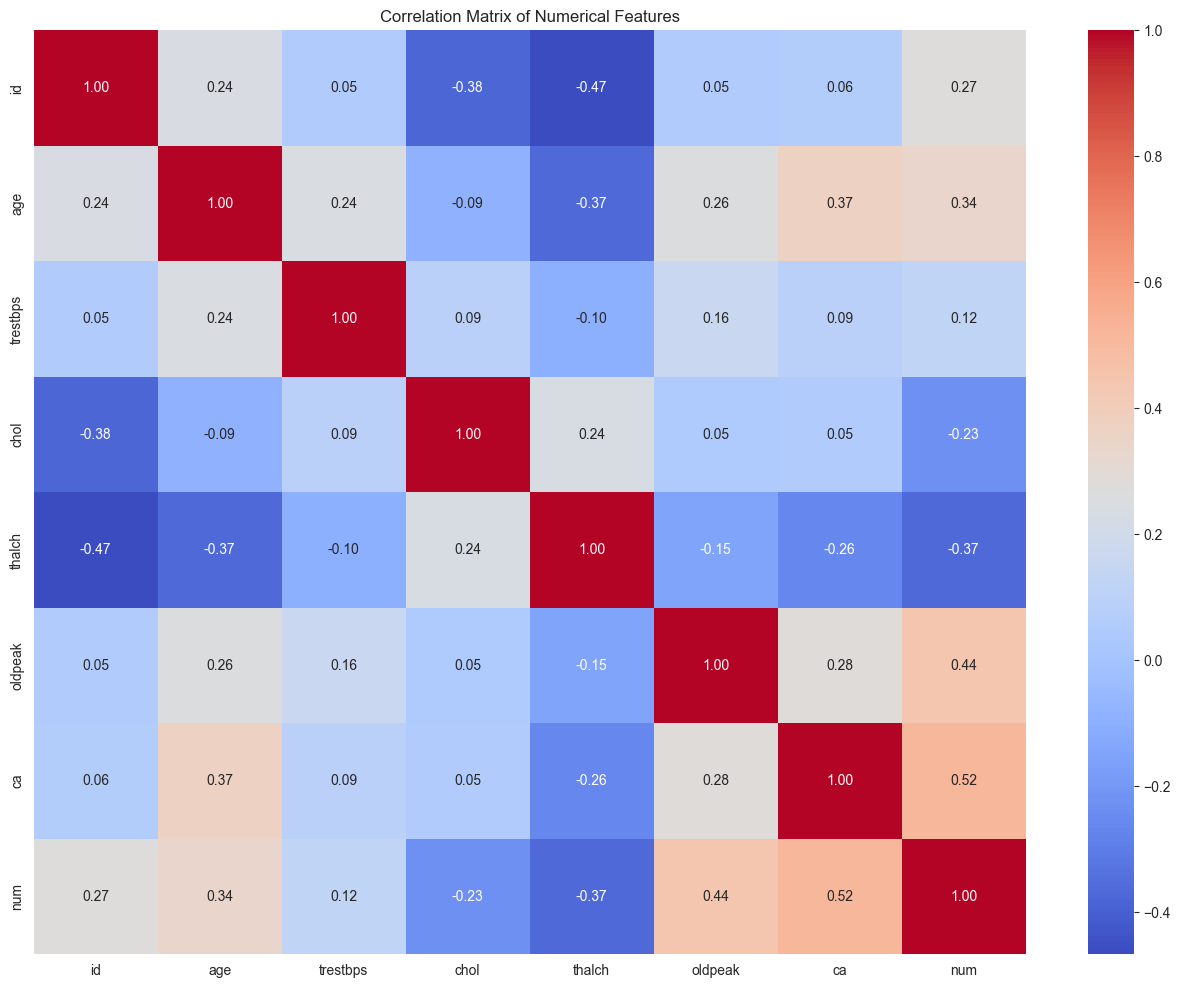

In [8]:
plt.figure(figsize=(16, 12))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = df.drop('num', axis=1)
y = df['num']

# Drop columns that are not features
X = X.drop(['id', 'dataset'], axis=1)


In [14]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features   = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [16]:
# Numerical: mean imputation
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[numerical_features])
X_test_num  = num_imputer.transform(X_test[numerical_features])

# Categorical: most-frequent imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat  = cat_imputer.transform(X_test[categorical_features])


In [13]:
print(X_train.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [17]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)


In [20]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc  = encoder.transform(X_test_cat)


In [21]:
# Get the encoded column names
encoded_cat_cols = encoder.get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical
X_train_prepared = np.hstack([X_train_num_scaled, X_train_cat_enc])
X_test_prepared  = np.hstack([X_test_num_scaled,  X_test_cat_enc])

# Optional: convert to DataFrame for readability
all_feature_names = numerical_features + list(encoded_cat_cols)
X_train_prepared = pd.DataFrame(X_train_prepared, columns=all_feature_names)
X_test_prepared  = pd.DataFrame(X_test_prepared,  columns=all_feature_names)


In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split columns by dtype
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
numerical_features   = X_train.select_dtypes(include='number').columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [23]:
# --- Impute numeric ---
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[numerical_features])
X_test_num  = num_imputer.transform(X_test[numerical_features])

# --- Scale numeric ---
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

# --- One-hot encode categoricals (if any) ---
if categorical_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
    X_test_cat  = cat_imputer.transform(X_test[categorical_features])

    encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    X_train_cat_enc = encoder.fit_transform(X_train_cat)
    X_test_cat_enc  = encoder.transform(X_test_cat)
else:
    # No categorical columns
    X_train_cat_enc = None
    X_test_cat_enc  = None


In [24]:
import numpy as np
import pandas as pd

if categorical_features:
    X_train_ready = np.hstack([X_train_num_scaled, X_train_cat_enc])
    X_test_ready  = np.hstack([X_test_num_scaled,  X_test_cat_enc])
    all_feature_names = numerical_features + list(encoder.get_feature_names_out(categorical_features))
else:
    X_train_ready = X_train_num_scaled
    X_test_ready  = X_test_num_scaled
    all_feature_names = numerical_features

# Optional: turn into DataFrames
X_train_ready = pd.DataFrame(X_train_ready, columns=all_feature_names)
X_test_ready  = pd.DataFrame(X_test_ready,  columns=all_feature_names)


In [25]:
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr.fit(X_train_ready, y_train)

y_pred_lr = lr.predict(X_test_ready)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.5217391304347826
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        82
           1       0.44      0.40      0.42        53
           2       0.25      0.14      0.18        22
           3       0.16      0.24      0.19        21
           4       0.21      0.67      0.32         6

    accuracy                           0.52       184
   macro avg       0.38      0.44      0.38       184
weighted avg       0.57      0.52      0.54       184



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest on the preprocessed data
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1        # use all CPU cores for efficiency
)
rf.fit(X_train_ready, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_ready)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.5652173913043478
Confusion Matrix:
 [[69  8  5  0  0]
 [16 29  3  5  0]
 [ 3  8  2  9  0]
 [ 4  9  4  4  0]
 [ 0  1  2  3  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        82
           1       0.53      0.55      0.54        53
           2       0.12      0.09      0.11        22
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.32      0.33      0.33       184
weighted avg       0.52      0.57      0.54       184



C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit SVM directly on the processed arrays
svm_clf = SVC(
    kernel='rbf',       # default kernel; try 'linear' or 'poly' if you like
    random_state=42,
    probability=False   # set True only if you need predicted probabilities
)
svm_clf.fit(X_train_ready, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test_ready)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.5706521739130435
Confusion Matrix:
 [[70  8  1  3  0]
 [13 32  1  7  0]
 [ 4  6  2 10  0]
 [ 6 12  2  1  0]
 [ 0  2  2  2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        82
           1       0.53      0.60      0.57        53
           2       0.25      0.09      0.13        22
           3       0.04      0.05      0.05        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.32      0.32      0.31       184
weighted avg       0.52      0.57      0.54       184



C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\K. SHIVAIAH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit KNN directly on the preprocessed arrays
knn_clf = KNeighborsClassifier(
    n_neighbors=5,   # default; tune this value for best results
    weights='uniform',  # or 'distance'
    n_jobs=-1          # use all cores
)
knn_clf.fit(X_train_ready, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test_ready)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Accuracy: 0.5815217391304348
Confusion Matrix:
 [[71  7  1  2  1]
 [15 30  4  4  0]
 [ 4  6  2 10  0]
 [ 5 10  2  4  0]
 [ 0  1  3  2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80        82
           1       0.56      0.57      0.56        53
           2       0.17      0.09      0.12        22
           3       0.18      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.33      0.34      0.33       184
weighted avg       0.53      0.58      0.55       184



In [29]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        82
           1       0.44      0.40      0.42        53
           2       0.25      0.14      0.18        22
           3       0.16      0.24      0.19        21
           4       0.21      0.67      0.32         6

    accuracy                           0.52       184
   macro avg       0.38      0.44      0.38       184
weighted avg       0.57      0.52      0.54       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        82
           1       0.53      0.55      0.54        53
           2       0.12      0.09      0.11        22
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.32      0.33      0.33       184
we

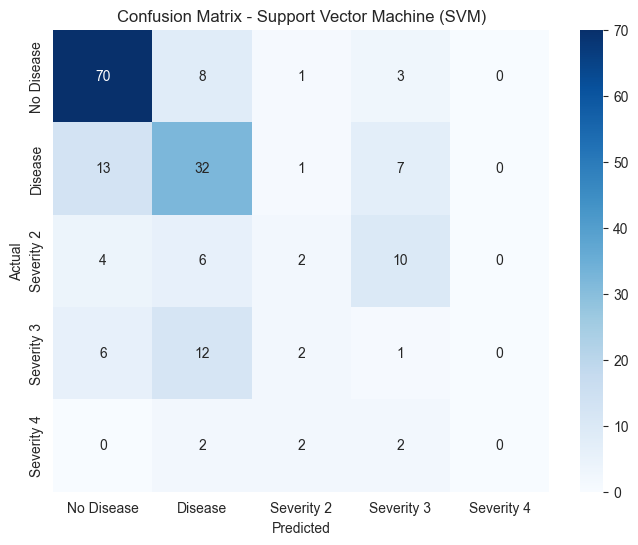

In [30]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We already built X_train_ready earlier
# and trained the RandomForest model as `rf`

# If you converted to a DataFrame when combining features:
feature_names = X_train_ready.columns

# Extract importances directly from the model
importances = rf.feature_importances_

# Build a DataFrame for easy plotting
feature_importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
      .sort_values(by='Importance', ascending=False)
      .head(10)
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='rocket',
    hue='Feature',
    legend=False
)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()
